In [1]:
import nltk

In [4]:
# nltk.download_shell()
# to download the necessary packages

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [9]:
for mess_no, message in enumerate(messages[:10]):
    print (mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [10]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [11]:
import pandas as pd

In [13]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])

In [14]:
messages.head()

label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [15]:
messages.describe()

label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30

In [16]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [20]:
messages['length'] = messages['message'].apply(len)

In [21]:
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

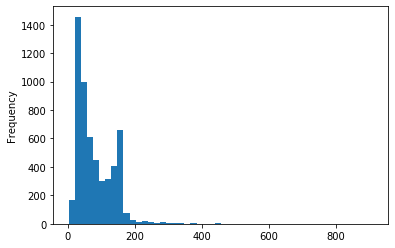

In [23]:
messages['length'].plot.hist(bins=50)

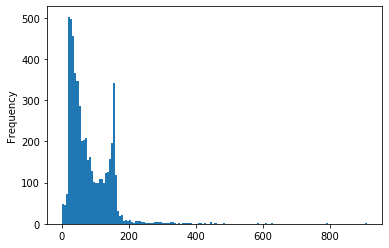

In [24]:
messages['length'].plot.hist(bins=150)

In [25]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [27]:
# pandas masking
messages[messages['length']==910]

label                                            message  length
1085   ham  For me the love should start with attraction.i...     910

In [28]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe4b8669950>,
      dtype=object)

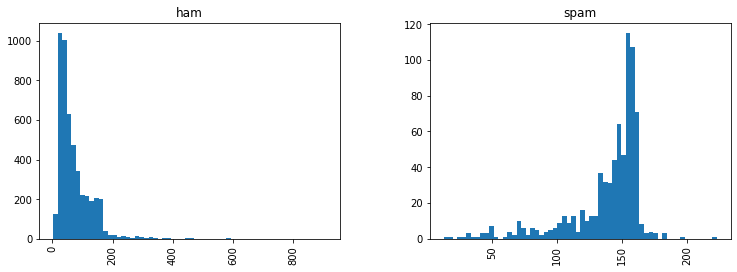

In [30]:
messages.hist(column='length', by='label', bins=60, figsize=(12,4))

In [ ]:
### PART 2

In [31]:
import string

In [32]:
mess = 'Sample message! Notice: It has punctuation.'

In [33]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
nopunc = [c for c in mess if c not in string.punctuation]

In [35]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'I',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [36]:
from nltk.corpus import stopwords

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
nopunc = ''.join(nopunc)

In [39]:
nopunc

'Sample message Notice It has punctuation'

In [42]:
x = ['a', 'b', 'c', 'd']
y = '_'.join(x)
y

'a_b_c_d'

In [43]:
nopunc.split()

['Sample', 'message', 'Notice', 'It', 'has', 'punctuation']

In [44]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [47]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [48]:
def text_process(mess):
    """
    1. remove punc
    2. remove stopwords
    3. return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    
    

In [49]:
messages.head()

label                                            message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61

In [50]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [53]:
list(map(text_process, messages['message'].head(5)))

[['Go',
  'jurong',
  'point',
  'crazy',
  'Available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'Cine',
  'got',
  'amore',
  'wat'],
 ['Ok', 'lar', 'Joking', 'wif', 'u', 'oni'],
 ['Free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  'Text',
  'FA',
  '87121',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'rateTCs',
  'apply',
  '08452810075over18s'],
 ['U', 'dun', 'say', 'early', 'hor', 'U', 'c', 'already', 'say'],
 ['Nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']]

In [55]:
# Check vectorization in the file used for teaching.(provided by instructor )

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['message'])

In [58]:
print(len(bow_transformer.vocabulary_))

11425


In [59]:
mess4 = messages['message'][3]

In [60]:
print(mess4)

U dun say so early hor... U c already then say...


In [61]:
bow4 = bow_transformer.transform([mess4])

In [62]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [63]:
print(bow4.shape)

(1, 11425)


In [64]:
# to check which word appeared twice
bow_transformer.get_feature_names()[4068]

'U'

In [65]:
bow_transformer.get_feature_names()[9554]

'say'

In [ ]:
## PART 3
# Sparce MAtrix

In [66]:
messages_bow = bow_transformer.transform(messages['message'])

In [70]:
print('Shape of the sparse matrix: ', messages_bow.shape)

Shape of the sparse matrix:  (5572, 11425)


In [71]:
# non zero occurances
messages_bow.nnz

50548

In [73]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])) 
print('sparsity: {}'. format(sparsity))


sparsity: 0.07940295412668218


In [74]:
from sklearn.feature_extraction.text import TfidfTransformer

In [80]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [81]:
tfidf4 = tfidf_transformer.transform(bow4)

In [82]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [83]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [84]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [86]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
### Instructor documents are very understandable with proper info.. It's better to go through them whenever needed